<h1 style="font-size:3rm;color:green;">Health Data Jupyter Notebook</h1>
This notebook contains Kim's Apple Health Data for 2 years. Time period of June 1, 2020 - May 31, 2022.

<img src=kim-health-data.png>

<h3 style="font-size:3rm;color:blue;">Import Health Data</h3>
Use of Pandas to import .csv file/data. Also import Numpy for additional data analysis.

In [275]:
import numpy as np
import pandas as pd
health_data_2year = pd.read_csv("Export_ActiveEnergyBurned.csv")
health_data_2year.head()

,Date,Active energy burned(Cal),Apple Watch stand hours(hr),Basal energy burned(Cal),Exercise time(min),Flights climbed(count),Heart rate(count/min),Resting heart rate(count/min),Stand time(min),Step count(count),Walking heart rate average(count/min)
0,2020-06,32562.605,519.0,70145.420,1771.0,40.470,83.686,57.467,5448.0,342345.273,108.483
1,2020-07,33837.342,506.0,72420.122,2026.0,98.171,85.217,58.065,5168.0,362907.978,108.806
2,2020-08,33936.205,480.0,70660.916,2185.0,150.113,85.162,60.188,4939.0,300141.779,102.565
3,2020-09,31957.453,477.0,68383.441,1904.0,232.420,88.482,60.733,5772.0,398573.937,114.017
4,2020-10,26645.052,470.0,67709.706,1455.0,69.000,76.347,57.677,3969.0,242276.382,97.016


<h3 style="font-size:3rm;color:orange;">Clean Data</h3>
Clean data file to remove unnecessary columns related to stand time, stand time in hours and flights of stairs climbed.

In [276]:
health_data_2year_dataframe = health_data_2year.drop(columns=['Apple Watch stand hours(hr)','Flights climbed(count)','Stand time(min)'])
health_data_2year_dataframe.head()

,Date,Active energy burned(Cal),Basal energy burned(Cal),Exercise time(min),Heart rate(count/min),Resting heart rate(count/min),Step count(count),Walking heart rate average(count/min)
0,2020-06,32562.605,70145.420,1771.0,83.686,57.467,342345.273,108.483
1,2020-07,33837.342,72420.122,2026.0,85.217,58.065,362907.978,108.806
2,2020-08,33936.205,70660.916,2185.0,85.162,60.188,300141.779,102.565
3,2020-09,31957.453,68383.441,1904.0,88.482,60.733,398573.937,114.017
4,2020-10,26645.052,67709.706,1455.0,76.347,57.677,242276.382,97.016


Transform data to round all numbers to .0

In [277]:
health_data_2year_dataframe = health_data_2year.round()
health_data_2year_dataframe.head()

,Date,Active energy burned(Cal),Apple Watch stand hours(hr),Basal energy burned(Cal),Exercise time(min),Flights climbed(count),Heart rate(count/min),Resting heart rate(count/min),Stand time(min),Step count(count),Walking heart rate average(count/min)
0,2020-06,32563.0,519.0,70145.0,1771.0,40.0,84.0,57.0,5448.0,342345.0,108.0
1,2020-07,33837.0,506.0,72420.0,2026.0,98.0,85.0,58.0,5168.0,362908.0,109.0
2,2020-08,33936.0,480.0,70661.0,2185.0,150.0,85.0,60.0,4939.0,300142.0,103.0
3,2020-09,31957.0,477.0,68383.0,1904.0,232.0,88.0,61.0,5772.0,398574.0,114.0
4,2020-10,26645.0,470.0,67710.0,1455.0,69.0,76.0,58.0,3969.0,242276.0,97.0


<h3 style="font-size:3rm;color:orange;">Analyze Data - Active Energy Burned (calories)</h3>
Active Energy Burned is an estimate of the calories you burn over the course of a time period through exercise or other activity.

Isolate monthly date range and monthly active energy burned data.

In [278]:
round(pd.pivot_table(health_data_2year, index=["Date"], values=["Active energy burned(Cal)"], aggfunc=np.sum))

,Active energy burned(Cal)
Date,
2020-06,32563.0
2020-07,33837.0
2020-08,33936.0
2020-09,31957.0
2020-10,26645.0
2020-11,26924.0
2020-12,28943.0
2021-01,24709.0
2021-02,24952.0


Calculate the <b>median</b> of Active energy burned(calories). Save information as a variable 'median_active_eng_burned'.

In [279]:
median_active_eng_burned = health_data_2year_dataframe['Active energy burned(Cal)'].median()
print(median_active_eng_burned)

26020.5


Find the <b>minimum</b> of Active energy burned(calories). Save information as a variable 'min_active_eng_burned'.

In [280]:
min_active_eng_burned = health_data_2year_dataframe['Active energy burned(Cal)'].min()
print(min_active_eng_burned)

21615.0


Find the <b>maximum</b> of Active energy burned(calories). Save information as a variable 'max_active_eng_burned'.

In [281]:
max_active_eng_burned = health_data_2year_dataframe['Active energy burned(Cal)'].max()
print(max_active_eng_burned)

33936.0


Use of <b>Matplotlib</b> to create Bar Plot graph.

In [282]:
from matplotlib import pyplot as plt

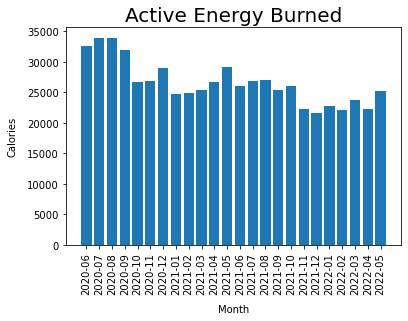

In [283]:
plt.bar(health_data_2year_dataframe['Date'], health_data_2year_dataframe['Active energy burned(Cal)'])
plt.xlabel("Month", labelpad=10)
plt.ylabel("Calories", labelpad=10)
plt.xticks(rotation="vertical")
plt.title("Active Energy Burned", fontsize=20)
plt.show()

<b>Interpretation of Active Energy Burned data:</b> 
During the 2-year period of June 2021 - June 2022, the min calories burned were 21,615. The median calories burned were 26,020 and the max calories burned were 33,936. 

<h3 style="font-size:3rm;color:orange;">Analyze Data - Exercise Time (minutes)</h3>


Isolate monthly date range and monthly exercise time data.

In [284]:
round(pd.pivot_table(health_data_2year, index=["Date"], values=["Exercise time(min)"], aggfunc=np.sum))

,Exercise time(min)
Date,
2020-06,1771.0
2020-07,2026.0
2020-08,2185.0
2020-09,1904.0
2020-10,1455.0
2020-11,1222.0
2020-12,1313.0
2021-01,1193.0
2021-02,1147.0


Use of <b>Matplotlib</b> to create scatter graph.

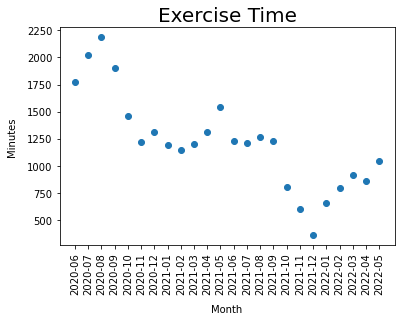

In [285]:
plt.scatter(health_data_2year_dataframe['Date'], health_data_2year_dataframe['Exercise time(min)'])
plt.xlabel("Month", labelpad=10)
plt.ylabel("Minutes", labelpad=10)
plt.xticks(rotation="vertical")
plt.title("Exercise Time", fontsize=20)
plt.show()

Calculate the <b>sum</b> of exercise time (minutes). Save information as a variable 'sum_exercise_time'.

In [286]:
sum_exercise_time = health_data_2year_dataframe['Exercise time(min)'].sum()
print(sum_exercise_time)

29256.0


Convert exercise time sum from <b>minutes to hours</b>.

In [287]:
hours_exercise_time = sum_exercise_time/60
print(hours_exercise_time)

487.6


Convert exercise time sum from <b>hours to days</b>.

In [288]:
days_exercise_time = hours_exercise_time/24
print(days_exercise_time)

20.316666666666666


<b>Interpretation of Exercise time data:</b> 
During the 2-year period of June 2021 - June 2022, the total exercise time was 29,256 minutes which is equal to 487.6 hours, or a total of 20 days.

## The End :)